# Using a Jupyter Notebook to perform a nanopublication analysis over five datasets (DisGeNet, NeXtProt, WikiPathways, LIDDI, OpenBEL)

Imran Asif ([ORCID:0000-0002-1144-6265](https://orcid.org/0000-0002-1144-6265))  
PhD Student, Computer Science

_Heriot-Watt University, Edinburgh, UK_

__Information:__ I have basic information about how much nanopublications are published on different servers. the following graph shows the total number of nanopublications among different datasets

In [1]:
#Check for python version
#import struct
#print(struct.calcsize("P") * 8)

64


## Import Libraries ##

In [2]:
import seaborn as sns
# import pandas
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt

import csv

## SPARQL EndPoints ##

In [3]:
from SPARQLWrapper import SPARQLWrapper, JSON
#Define local DisGeNet SPARQL endpoint and function to run queries over it
dbSparqlDGN = SPARQLWrapper("http://localhost:8890/sparql/")
#dbSparqlDGN = SPARQLWrapper("http://localhost:3030/DisGeNet_V4/query")
dbSparqlDGN.setReturnFormat(JSON)

def queryDisGeNET(query):
    dbSparqlDGN.setQuery(query)
    results = dbSparqlDGN.queryAndConvert()
    return results

#Define local NeXtProt SPARQL endpoint and function to run queries over it
dbSparqlNxt = SPARQLWrapper("http://localhost:3030/nextProt/query")
dbSparqlNxt.setReturnFormat(JSON)

def queryNeXtProt(query):
    dbSparqlNxt.setQuery(query)
    results = dbSparqlNxt.queryAndConvert()
    return results

#Define local WikiPathways SPARQL endpoint and function to run queries over it
dbSparqlWP = SPARQLWrapper("http://localhost:3030/WikiPathways/query")
dbSparqlWP.setReturnFormat(JSON)

def queryWP(query):
    dbSparqlWP.setQuery(query)
    results = dbSparqlWP.queryAndConvert()
    return results

#Define local OpenBell Large Corpus SPARQL endpoint and function to run queries over it
dbSparqlOBL = SPARQLWrapper("http://localhost:3030/OpenBellLargeCorpus/query")
dbSparqlOBL.setReturnFormat(JSON)

def queryOpenBellLarge(query):
    dbSparqlOBL.setQuery(query)
    results = dbSparqlOBL.queryAndConvert()
    return results

#Define local OpenBell Small Corpus SPARQL endpoint and function to run queries over it
dbSparqlOBS = SPARQLWrapper("http://localhost:3030/OpenBellSmallCorpus/query")
dbSparqlOBS.setReturnFormat(JSON)

def queryOpenBellSmall(query):
    dbSparqlOBS.setQuery(query)
    results = dbSparqlOBS.queryAndConvert()
    return results

#Define local LIDDI SPARQL endpoint and function to run queries over it
dbSparqlLIDDI = SPARQLWrapper("http://localhost:3030/LIDDI/query")
dbSparqlLIDDI.setReturnFormat(JSON)

def queryLIDDI(query):
    dbSparqlLIDDI.setQuery(query)
    results = dbSparqlLIDDI.queryAndConvert()
    return results

## Utilities

In [4]:
# Define function to get the array of count result from JSON SPARQL result set
def get_array(results):
    """
    Extract the count result from the JSON format
    """
    array = []
    for result in results["results"]["bindings"]:
        if((result["count"]["value"]).isnumeric()):
            value = int(result["count"]["value"])
            array.append(value)
    array.sort()
    return array

def average(list):
    return sum(list) / float(len(list)) 

## NeXtProt Distribution ##

### [NeXtProt](https://www.nextprot.org/) ###

neXtProt is an on-line knowledge platform on human proteins. It strives to be a comprehensive resource that provides a variety of types of information on human proteins, such as their function, subcellular location, expression, interactions and role in diseases.

4025981 nanopublications. These nanopubs were automatically extracted from the neXtProt dataset. This set of nanopublications is preliminary. We are using 2015 version of nextProt nanopubliation for nanopublication triples analyses. The author for converting the nextprot dataset to nanopublication dataset was Oliver Karch who updated the [nextport nanopublication dataset](https://old.datahub.io/dataset/nextprot-preliminary-nanopubs) on July 27, 2015, 3:49 PM

In [10]:
# The following query represent the triple's count of each head graph
query = """
prefix np: <http://www.nanopub.org/nschema#>
select (count(?h) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
                  ?p ?o .
       }
    }
GROUP BY ?h
"""

results = queryNeXtProt(query)
nxtHeadTriples = get_array(results)

In [11]:
# The following query represent the triple's count of each assertion graph
query = """
prefix np: <http://www.nanopub.org/nschema#>

    select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
          np:hasAssertion ?a .
      }
      graph ?a {?s ?p ?o}
    } 
    GROUP BY ?a
"""

results = queryNeXtProt(query)
nxtAssertionTriples = get_array(results)

In [12]:
# The following query represent the triple's count of each Provenance graph
query = """
prefix np: <http://www.nanopub.org/nschema#>

    select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
          np:hasProvenance ?prov .
      }
      graph ?prov {?s ?p ?o}
    } 
    GROUP BY ?prov
"""

results = queryNeXtProt(query)
nxtProvenanceTriples = get_array(results)

In [13]:
# The following query represent the triple's count of each Publication Information graph
query = """
prefix np: <http://www.nanopub.org/nschema#>

    select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
          np:hasPublicationInfo ?pubInfo .
      }
      graph ?pubInfo {?s ?p ?o}
    } 
    GROUP BY ?pubInfo
"""

results = queryNeXtProt(query)
nxtPubInfoTriples = get_array(results)

In [44]:
with open('distributionNeXtProt.csv', mode='w') as csv_file:
    fieldnames = ['Graphs', 'Triples']
    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    writer.writerow(['Graphs', 'Triples'])
    
    # For Head Graph
    for t in nxtHeadTriples:
        writer.writerow(['Head', t])
    
    #For Assertion Graph
    for t in nxtAssertionTriples:
        writer.writerow(['Assertion', t])
        
    #For Provenance Graph
    for t in nxtProvenanceTriples:
        writer.writerow(['Provenance', t])
        
    #For Publication Information Graph
    for t in nxtPubInfoTriples:
        writer.writerow(['PublicationInfo', t])

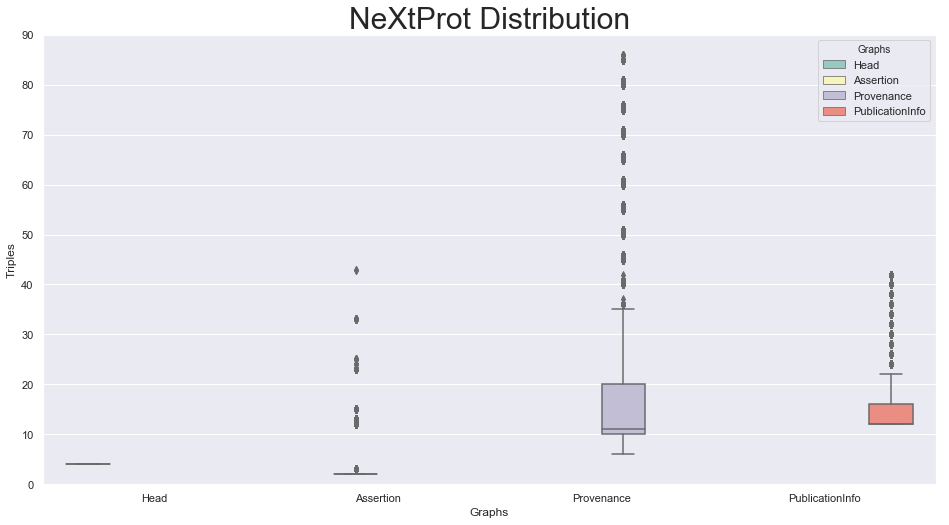

In [45]:
dataNeXt = pd.read_csv('distributionNeXtProt.csv')
#{'Graphs': ['Head', 'Assertion', 'Provenance', 'Publication Information'], 'Triples':[nxtHeadTriples, nxtAssertionTriples, nxtProvenanceTriples, nxtPubInfoTriples]}

sns.set(style="whitegrid"),
sns.set(rc={'figure.figsize':(16,8.27)}),
#print(data)
ax = sns.boxplot(x="Graphs", y="Triples", hue="Graphs", data=dataNeXt, palette="Set3")
ax.axes.set_title("NeXtProt Distribution",fontsize=30)
ax.set_ylim(0, 90);

## WikiPathways Distribution ##

### [WikiPathways](https://www.wikipathways.org)
WikiPathways was established to facilitate the contribution and maintenance of pathway information by the biology community. WikiPathways is an open, collaborative platform dedicated to the curation of biological pathways. Each pathway at WikiPathways has a dedicated wiki page, displaying the current diagram, description, references, download options, version history, and component gene and protein lists. Any pathway can be edited from within its wiki page by activating an embedded pathway editor. 

[WikiPathways Semantic Web portal](https://www.wikipathways.org/index.php/Portal:Semantic_Web) describes the Semantic Web features of the WikiPathways databases, such as the Resource Description Framework (RDF) translation, the ontology, and the new nanopublications.

We are using Wikipathways nanopublication 2017 version. The author Tobias Kuhn converted wikipathways database to nanopublication in October 05, 2017.

In [4]:
# The following query represent the triple's count of each head graph
query = """
prefix np: <http://www.nanopub.org/nschema#>
select (count(?h) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
                  ?p ?o .
       }
    }
GROUP BY ?h
"""

results = queryWP(query)
wpHeadTriples = get_array(results)

In [5]:
# The following query represent the triple's count of each assertion graph
query = """
prefix np: <http://www.nanopub.org/nschema#>

    select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
          np:hasAssertion ?a .
      }
      graph ?a {?s ?p ?o}
    } 
    GROUP BY ?a
"""

results = queryWP(query)
wpAssertionTriples = get_array(results)

In [6]:
# The following query represent the triple's count of each Provenance graph
query = """
prefix np: <http://www.nanopub.org/nschema#>

    select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
          np:hasProvenance ?prov .
      }
      graph ?prov {?s ?p ?o}
    } 
    GROUP BY ?prov
"""

results = queryWP(query)
wpProvenanceTriples = get_array(results)

In [7]:
# The following query represent the triple's count of each Publication Information graph
query = """
prefix np: <http://www.nanopub.org/nschema#>

    select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
          np:hasPublicationInfo ?pubInfo .
      }
      graph ?pubInfo {?s ?p ?o}
    } 
    GROUP BY ?pubInfo
"""

results = queryWP(query)
wpPubInfoTriples = get_array(results)

In [8]:
with open('distributionWikiPathways.csv', mode='w') as csv_file:
    fieldnames = ['Graphs', 'Triples']
    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    writer.writerow(['Graphs', 'Triples'])
    
    # For Head Graph
    for t in wpHeadTriples:
        writer.writerow(['Head', t])
    
    #For Assertion Graph
    for t in wpAssertionTriples:
        writer.writerow(['Assertion', t])
        
    #For Provenance Graph
    for t in wpProvenanceTriples:
        writer.writerow(['Provenance', t])
        
    #For Publication Information Graph
    for t in wpPubInfoTriples:
        writer.writerow(['PublicationInfo', t])

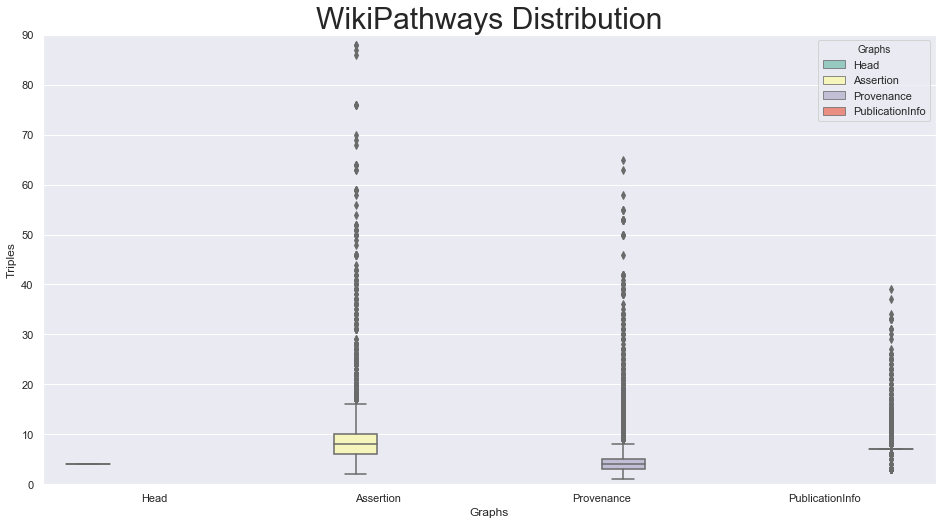

In [9]:
dataWP = pd.read_csv('distributionWikiPathways.csv')
#{'Graphs': ['Head', 'Assertion', 'Provenance', 'Publication Information'], 'Triples':[wpHeadTriples, wpAssertionTriples, wpProvenanceTriples, wpPubInfoTriples]}

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(16,8.27)})
ax = sns.boxplot(x="Graphs", y="Triples", hue="Graphs", data=dataWP, palette="Set3")
ax.axes.set_title("WikiPathways Distribution",fontsize=30)
ax.set_ylim(0, 90);

## DisGeNET Distribution ##

### [DisGeNet](http://www.disgenet.org/) ###
DisGeNET is a discovery platform containing one of the largest publicly available collections of genes and variants associated to human diseases ([Piñero et al., 2016](https://academic.oup.com/nar/article/45/D1/D833/2290909); [Piñero et al., 2015](https://www.ncbi.nlm.nih.gov/pubmed/25877637)). DisGeNET integrates data from expert curated repositories, GWAS catalogues, animal models and the scientific literature. DisGeNET data are homogeneously annotated with controlled vocabularies and community-driven ontologies. Additionally, several original metrics are provided to assist the prioritization of genotype–phenotype relationships.

The current version of DisGeNET (v6.0) contains 628,685 gene-disease associations (GDAs), between 17,549 genes and 24,166 diseases, disorders, traits, and clinical or abnormal human phenotypes, and 210,498 variant-disease associations (VDAs), between 117,337 variants and 10,358 diseases, traits, and phenotypes.

We are using two versions of nanopublication one is V3.0 and V4.0. For nanopublication triple anaylses we use V4.0 and upload this dataset on Virtuoso. For comperision between assertion graphs in V4 and V3 we are using Fuseki server. 

In [85]:
# The following query represent the triple's count of each head graph
query = """
prefix np: <http://www.nanopub.org/nschema#>

select (count(*) as ?count) where {
  {
    graph ?G {?h a np:Nanopublication .
              }
   } 
  graph ?G {?S ?P ?O}
} 
group by ?G
"""

results = queryDisGeNET(query)
dgHeadTriples = get_array(results)

In [17]:
query = """
    prefix np: <http://www.nanopub.org/nschema#>

        select (count(*) as ?count) where {
          graph ?h {
            ?_np_iri a np:Nanopublication ;
              np:hasAssertion ?a .
          }
          graph ?a {?s ?p ?o}
        } 
        GROUP BY ?a
    """

results = queryDisGeNET(query)
dgAssertionTriples = get_array(results)

In [18]:
# The following query represent the triple's count of each Provenance graph
query = """
prefix np: <http://www.nanopub.org/nschema#>

    select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
          np:hasProvenance ?prov .
      }
      graph ?prov {?s ?p ?o}
    } 
    GROUP BY ?prov
"""

results = queryDisGeNET(query)
dgProvenanceTriples = get_array(results)

In [19]:
# The following query represent the triple's count of each Publication Information graph
query = """
prefix np: <http://www.nanopub.org/nschema#>

    select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
          np:hasPublicationInfo ?pubInfo .
      }
      graph ?pubInfo {?s ?p ?o}
    } 
    GROUP BY ?pubInfo
"""

results = queryDisGeNET(query)
dgPubInfoTriples = get_array(results)

In [86]:
with open('distributionDisGeNET.csv', mode='w') as csv_file:
    fieldnames = ['Graphs', 'Triples']
    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    writer.writerow(['Graphs', 'Triples'])
    
    # For Head Graph
    for t in dgHeadTriples:
        writer.writerow(['Head', t])
    
    #For Assertion Graph
    for t in dgAssertionTriples:
        writer.writerow(['Assertion', t])
        
    #For Provenance Graph
    for t in dgProvenanceTriples:
        writer.writerow(['Provenance', t])
        
    #For Publication Information Graph
    for t in dgPubInfoTriples:
        writer.writerow(['PublicationInfo', t])

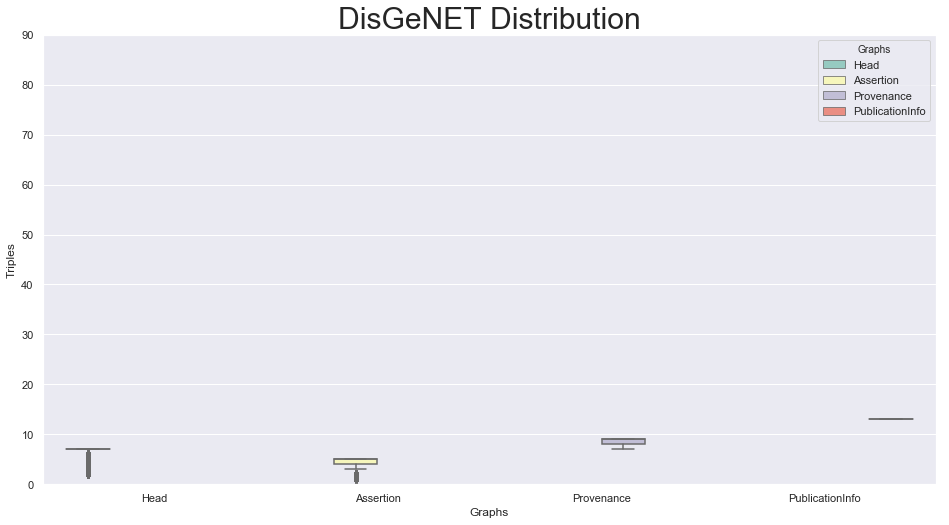

In [87]:
dataDG = pd.read_csv('distributionDisGeNET.csv')
#{'Graphs': ['Head', 'Assertion', 'Provenance', 'Publication Information'], 'Triples':[dgHeadTriples, dgAssertionTriples, dgProvenanceTriples, dgPubInfoTriples]}

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(16,8.27)})
ax = sns.boxplot(x="Graphs", y="Triples", hue="Graphs", data=dataDG, palette="Set3")
ax.axes.set_title("DisGeNET Distribution",fontsize=30)
ax.set_ylim(0, 90);

## OpenBel Small and Large Corpus Distribution 

### [OpenBEL](http://openbel.org/) ###

The Biological Expression Language (BEL) is a language for representing scientific findings in the life sciences in a computable form. BEL is designed to represent scientific findings by capturing causal and correlative relationships in context, where context can include information about the biological and experimental system in which the relationships were observed, the supporting publications cited and the curation process used.

74173 nanopublications. These nanopubs were automatically converted from OpenBEL's Small/Large Corpus version 20131211.

#### [Summary of Large and Small BEL Corpora](https://wiki.openbel.org/display/home/Summary+of+Large+and+Small+BEL+Corpora) ####

The primary intent for the small and large corpus is to provide a public source of examples of knowledge representation in BEL.

##### Small Corpus #####
The small corpus is primarily derived from full-text articles including abstract and caption text, but not derived from tables or diagrams. The small corpus comprises approximately 2000 BEL statements manually curated from 57 articles listed in PubMed of related topics. There are around 800 unique evidences and ~1700 causal statements. These BEL statements represent observations from experiments performed in human, mouse, and rat.

##### Large Corpus #####
The large corpus is a subset of the Selventa Knowledgebase, consisting of approximately 80,000 BEL statements from ~16300 citations. This corpus does not include statements extracted from tables or high throughput experiments, and corresponding citations have not necessarily been fully curated like in the small corpus. The statements are a collection of independent observations that were not selected to represent any specific biological process(es) or signaling pathway(s). Transcriptional control statements were selected in a balanced manner and protein signaling cascades were included in reasonable detail. There are ~59500 causal statements. These BEL statements represent observations from experiments performed in human, mouse and rat.

In [23]:
# The following query represent the triple's count of each head graph
#Large Corpus
query = """
   prefix np: <http://www.nanopub.org/nschema#>
select (count(?h) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
                  ?p ?o .
       }
    }
GROUP BY ?h
    """

results = queryOpenBellLarge(query)
oblHeadTriples = get_array(results)

#Small Corpus
query = """
    prefix np: <http://www.nanopub.org/nschema#>
select (count(?h) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
                  ?p ?o .
       }
    }
GROUP BY ?h
    """

results = queryOpenBellSmall(query)
obsHeadTriples = get_array(results)

openBellHeadTriples = []
openBellHeadTriples.extend(oblHeadTriples)
openBellHeadTriples.extend(obsHeadTriples)
openBellHeadTriples.sort()

In [24]:
#Large Corpus
query = """
    prefix np: <http://www.nanopub.org/nschema#>

        select (count(*) as ?count) where {
          graph ?h {
            ?_np_iri a np:Nanopublication ;
              np:hasAssertion ?a .
          }
          graph ?a {?s ?p ?o}
        } 
        GROUP BY ?a
    """

results = queryOpenBellLarge(query)
oblAssertionTriples = get_array(results)

#Small Corpus
query = """
    prefix np: <http://www.nanopub.org/nschema#>

        select (count(*) as ?count) where {
          graph ?h {
            ?_np_iri a np:Nanopublication ;
              np:hasAssertion ?a .
          }
          graph ?a {?s ?p ?o}
        } 
        GROUP BY ?a
    """

results = queryOpenBellSmall(query)
obsAssertionTriples = get_array(results)

openBellAssertionTriples = []
openBellAssertionTriples.extend(oblAssertionTriples)
openBellAssertionTriples.extend(obsAssertionTriples)
openBellAssertionTriples.sort()

In [25]:
# The following query represent the triple's count of each Provenance graph
query = """
prefix np: <http://www.nanopub.org/nschema#>

    select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
          np:hasProvenance ?prov .
      }
      graph ?prov {?s ?p ?o}
    } 
    GROUP BY ?prov
"""

results = queryOpenBellLarge(query)
oblProvenanceTriples = get_array(results)

#Small
query = """
prefix np: <http://www.nanopub.org/nschema#>

    select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
          np:hasProvenance ?prov .
      }
      graph ?prov {?s ?p ?o}
    } 
    GROUP BY ?prov
"""

results = queryOpenBellSmall(query)
obsProvenanceTriples = get_array(results)

openBellProvenanceTriples = []
openBellProvenanceTriples.extend(oblProvenanceTriples)
openBellProvenanceTriples.extend(obsProvenanceTriples)
openBellProvenanceTriples.sort()

In [26]:
# The following query represent the triple's count of each Publication Information graph
query = """
prefix np: <http://www.nanopub.org/nschema#>

    select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
          np:hasPublicationInfo ?pubInfo .
      }
      graph ?pubInfo {?s ?p ?o}
    } 
    GROUP BY ?pubInfo
"""

results = queryOpenBellLarge(query)
oblPubInfoTriples = get_array(results)

#Small 
query = """
prefix np: <http://www.nanopub.org/nschema#>

    select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
          np:hasPublicationInfo ?pubInfo .
      }
      graph ?pubInfo {?s ?p ?o}
    } 
    GROUP BY ?pubInfo
"""

results = queryOpenBellSmall(query)
obsPubInfoTriples = get_array(results)

openBellPubInfoTriples = []
openBellPubInfoTriples.extend(oblPubInfoTriples)
openBellPubInfoTriples.extend(obsPubInfoTriples)
openBellPubInfoTriples.sort()

In [27]:
with open('distributionOpenBel.csv', mode='w') as csv_file:
    fieldnames = ['Graphs', 'Triples']
    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    writer.writerow(['Graphs', 'Triples'])
    
    # For Head Graph
    for t in openBellHeadTriples:
        writer.writerow(['Head', t])
    
    #For Assertion Graph
    for t in openBellAssertionTriples:
        writer.writerow(['Assertion', t])
        
    #For Provenance Graph
    for t in openBellProvenanceTriples:
        writer.writerow(['Provenance', t])
        
    #For Publication Information Graph
    for t in openBellPubInfoTriples:
        writer.writerow(['PublicationInfo', t])

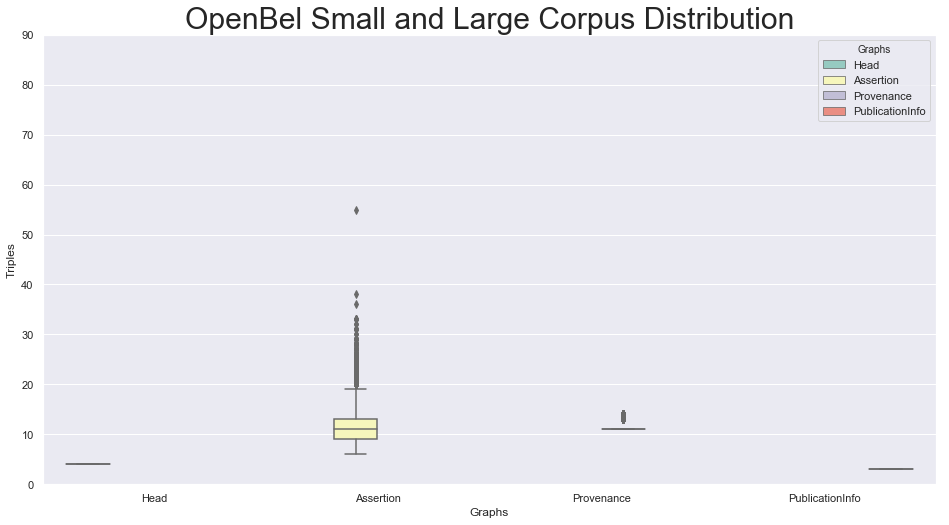

In [28]:
dataOB = pd.read_csv('distributionOpenBel.csv')
#{'Graphs': ['Head', 'Assertion', 'Provenance', 'Publication Information'], 'Triples':[openBellHeadTriples, openBellAssertionTriples, openBellProvenanceTriples, openBellPubInfoTriples]}

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(16,8.27)})
ax = sns.boxplot(x="Graphs", y="Triples", hue="Graphs", data=dataOB, palette="Set3")
ax.axes.set_title("OpenBel Small and Large Corpus Distribution",fontsize=30)
ax.set_ylim(0, 90);

## LInked Drug-Drug Interactions Distribution 

### [LIDDI](https://arxiv.org/abs/1507.05408) ###

LInked Drug-Drug Interactions (LIDDI), a public nanopublication-based RDF dataset with trusty URIs that encompasses some of the most cited prediction methods and sources to provide researchers a resource for leveraging the work of others into their prediction methods. As one of the main issues to overcome the usage of external resources is their mappings between drug names and identifiers used, we also provide the set of mappings we curated to be able to compare the multiple sources we aggregate in our dataset.

98085 nanopublications. This dataset combines data on drug-drug interactions from different sources, and formats them as nanopublications. The version we are using [V1.02](https://github.com/jmbanda/LInked-Drug-Drug-Interactions) and the author of this dataset is Juan M. Banda who created this dataset in July 20, 2015.

In [29]:
# The following query represent the triple's count of each head graph
query = """
prefix np: <http://www.nanopub.org/nschema#>
select (count(?h) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
                  ?p ?o .
       }
    }
GROUP BY ?h
"""

results = queryLIDDI(query)
liddiHeadTriples = get_array(results)

In [30]:
# The following query represent the triple's count of each assertion graph
query = """
prefix np: <http://www.nanopub.org/nschema#>

    select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
          np:hasAssertion ?a .
      }
      graph ?a {?s ?p ?o}
    } 
    GROUP BY ?a
"""

results = queryLIDDI(query)
liddiAssertionTriples = get_array(results)

In [31]:
# The following query represent the triple's count of each Provenance graph
query = """
prefix np: <http://www.nanopub.org/nschema#>

    select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
          np:hasProvenance ?prov .
      }
      graph ?prov {?s ?p ?o}
    } 
    GROUP BY ?prov
"""

results = queryLIDDI(query)
liddiProvenanceTriples = get_array(results)

In [32]:
# The following query represent the triple's count of each Provenance graph
query = """
prefix np: <http://www.nanopub.org/nschema#>

    select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication ;
          np:hasPublicationInfo ?pubInfo .
      }
      graph ?pubInfo {?s ?p ?o}
    } 
    GROUP BY ?pubInfo
"""

results = queryLIDDI(query)
liddiPubInfoTriples = get_array(results)

In [33]:
with open('distributionLIDD.csv', mode='w') as csv_file:
    fieldnames = ['Graphs', 'Triples']
    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    writer.writerow(['Graphs', 'Triples'])
    
    # For Head Graph
    for t in liddiHeadTriples:
        writer.writerow(['Head', t])
    
    #For Assertion Graph
    for t in liddiAssertionTriples:
        writer.writerow(['Assertion', t])
        
    #For Provenance Graph
    for t in liddiProvenanceTriples:
        writer.writerow(['Provenance', t])
        
    #For Publication Information Graph
    for t in liddiPubInfoTriples:
        writer.writerow(['PublicationInfo', t])

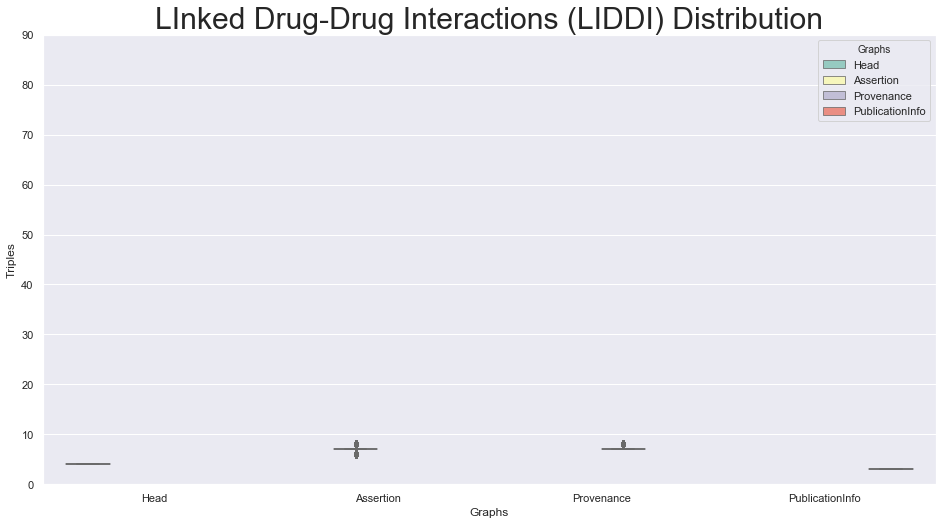

In [34]:
dataLiddi = pd.read_csv('distributionLIDD.csv')
#{'Graphs': ['Head', 'Assertion', 'Provenance', 'Publication Information'], 'Triples':[liddiHeadTriples, liddiAssertionTriples, liddiProvenanceTriples, liddiPubInfoTriples]}
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(16,8.27)})
ax = sns.boxplot(x="Graphs", y="Triples", hue="Graphs", data=dataLiddi, palette="Set3")
ax.axes.set_title("LInked Drug-Drug Interactions (LIDDI) Distribution",fontsize=30)
ax.set_ylim(0, 90);

## All Datasets in One Picture ##

In [54]:
with open('distributionAll.csv', mode='w') as csv_file:
    fieldnames = ['DataSets', 'Graphs', 'Triples']
    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    writer.writerow(['DataSets', 'Graphs', 'Triples'])
    
    # For NeXtProt DataSet
    for t in nxtHeadTriples:
        writer.writerow(['neXtProt 19001_20000', 'Head', t])
    for t in nxtAssertionTriples:
        writer.writerow(['neXtProt 19001_20000', 'Assertion', t])
    for t in nxtProvenanceTriples:
        writer.writerow(['neXtProt 19001_20000', 'Provenance', t])
    for t in nxtPubInfoTriples:
        writer.writerow(['neXtProt 19001_20000', 'PublicationInfo', t])
    
    #For Wikipathways dataset
    for t in wpHeadTriples:
        writer.writerow(['WikiPathways 20170513', 'Head', t])
    for t in wpAssertionTriples:
        writer.writerow(['WikiPathways 20170513', 'Assertion', t])
    for t in wpProvenanceTriples:
        writer.writerow(['WikiPathways 20170513', 'Provenance', t])
    for t in wpPubInfoTriples:
        writer.writerow(['WikiPathways 20170513', 'PublicationInfo', t])
        
    #For DisGeNet Dataset
    for t in dgHeadTriples:
        writer.writerow(['DisGeNET 4.0', 'Head', t])
    for t in dgAssertionTriples:
        writer.writerow(['DisGeNET 4.0', 'Assertion', t])
    for t in dgProvenanceTriples:
        writer.writerow(['DisGeNET 4.0', 'Provenance', t])
    for t in dgPubInfoTriples:
        writer.writerow(['DisGeNET 4.0', 'PublicationInfo', t])
        
    #For OpenBell Dataset
    for t in openBellHeadTriples:
        writer.writerow(['OpenBell 20131211', 'Head', t])
    for t in openBellAssertionTriples:
        writer.writerow(['OpenBell 20131211', 'Assertion', t])
    for t in openBellProvenanceTriples:
        writer.writerow(['OpenBell 20131211', 'Provenance', t])
    for t in openBellPubInfoTriples:
        writer.writerow(['OpenBell 20131211', 'PublicationInfo', t])
        
    #For LIDDI Dataset
    for t in liddiHeadTriples:
        writer.writerow(['LIDDI V1.02', 'Head', t])
    for t in liddiAssertionTriples:
        writer.writerow(['LIDDI V1.02', 'Assertion', t])
    for t in liddiProvenanceTriples:
        writer.writerow(['LIDDI V1.02', 'Provenance', t])
    for t in liddiPubInfoTriples:
        writer.writerow(['LIDDI V1.02', 'PublicationInfo', t])

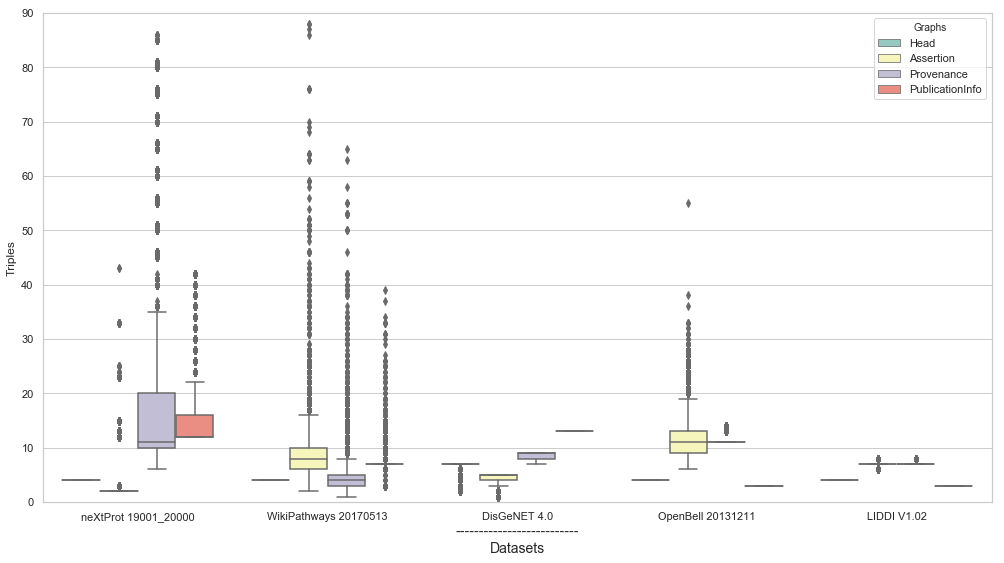

In [9]:
dataAll = pd.read_csv('distributionAll.csv')

sns.set(rc={'figure.figsize':(17,9)})
sns.set(style="whitegrid")
ax = sns.boxplot(x="DataSets", y="Triples", hue="Graphs", data=dataAll, palette="Set3")
#ax.axes.set_title("Frequency distribution of the number of triples in each graph of a nanopublication\n",fontsize=25)
ax.axes.set_xlabel('--------------------------\nDatasets', fontsize=14)
ax.set_ylim(0, 90);

## Load Triples count in each Dataset

In [4]:
# Declare arrays
nxtHeadTriples = []
nxtAssertionTriples = []
nxtProvenanceTriples = []
nxtPubInfoTriples = []

wpHeadTriples = []
wpAssertionTriples = []
wpProvenanceTriples = []
wpPubInfoTriples = []

dgHeadTriples = []
dgAssertionTriples = []
dgProvenanceTriples = []
dgPubInfoTriples = []

openBellHeadTriples = []
openBellAssertionTriples = []
openBellProvenanceTriples = []
openBellPubInfoTriples = []

liddiHeadTriples = []
liddiAssertionTriples = []
liddiProvenanceTriples = []
liddiPubInfoTriples = []

# For NextProt Dataset
with open('distributionNeXtProt.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            if len(row) > 0:
                if row[0] == 'Head':
                    nxtHeadTriples.append(int(row[1]))
                if row[0] == 'Assertion':
                    nxtAssertionTriples.append(int(row[1]))
                if row[0] == 'Provenance':
                    nxtProvenanceTriples.append(int(row[1]))
                if row[0] == 'PublicationInfo':
                    nxtPubInfoTriples.append(int(row[1]))
                    
# For Wikipathways Dataset
with open('distributionWikiPathways.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            if len(row) > 0:
                if row[0] == 'Head':
                    wpHeadTriples.append(int(row[1]))
                if row[0] == 'Assertion':
                    wpAssertionTriples.append(int(row[1]))
                if row[0] == 'Provenance':
                    wpProvenanceTriples.append(int(row[1]))
                if row[0] == 'PublicationInfo':
                    wpPubInfoTriples.append(int(row[1]))

                    
# For DisGeNET Dataset
with open('distributionDisGeNET.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            if len(row) > 0:
                if row[0] == 'Head':
                    dgHeadTriples.append(int(row[1]))
                if row[0] == 'Assertion':
                    dgAssertionTriples.append(int(row[1]))
                if row[0] == 'Provenance':
                    dgProvenanceTriples.append(int(row[1]))
                if row[0] == 'PublicationInfo':
                    dgPubInfoTriples.append(int(row[1]))
                    
# For OpenBel Dataset
with open('distributionOpenBel.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            if len(row) > 0:
                if row[0] == 'Head':
                    openBellHeadTriples.append(int(row[1]))
                if row[0] == 'Assertion':
                    openBellAssertionTriples.append(int(row[1]))
                if row[0] == 'Provenance':
                    openBellProvenanceTriples.append(int(row[1]))
                if row[0] == 'PublicationInfo':
                    openBellPubInfoTriples.append(int(row[1]))

# For LIDDI Dataset
with open('distributionLIDD.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            if len(row) > 0:
                if row[0] == 'Head':
                    liddiHeadTriples.append(int(row[1]))
                if row[0] == 'Assertion':
                    liddiAssertionTriples.append(int(row[1]))
                if row[0] == 'Provenance':
                    liddiProvenanceTriples.append(int(row[1]))
                if row[0] == 'PublicationInfo':
                    liddiPubInfoTriples.append(int(row[1]))

## Average Triples Count 

Text(0, 0.5, 'Average Triples Count')

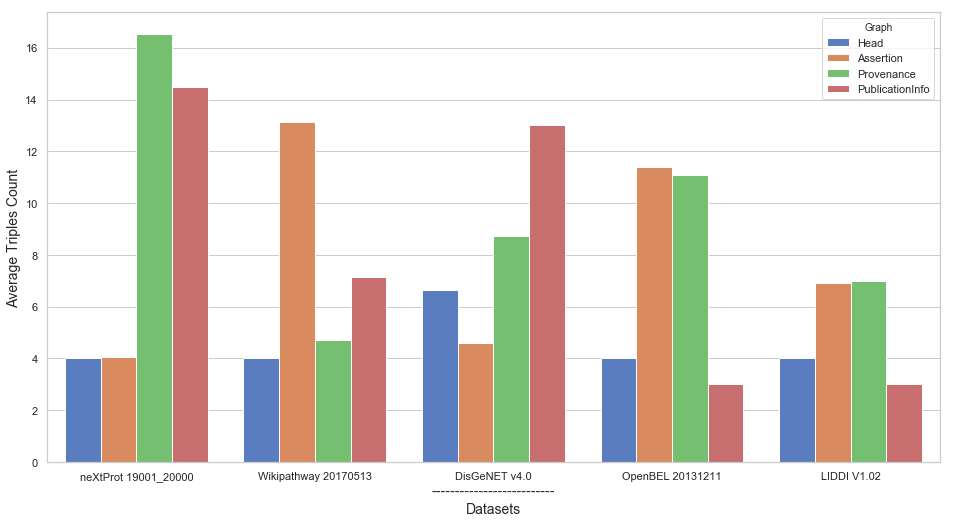

In [51]:
nxtHeadTriplesAvg = average(nxtHeadTriples)
nxtAssertionTriplesAvg = average(nxtAssertionTriples)
nxtProvenanceTriplesAvg = average(nxtProvenanceTriples)
nxtPubInfoTriplesAvg = average(nxtPubInfoTriples)

wpHeadTriplesAvg = average(wpHeadTriples)
wpAssertionTriplesAvg = average(wpAssertionTriples)
wpProvenanceTriplesAvg = average(wpProvenanceTriples)
wpPubInfoTriplesAvg = average(wpPubInfoTriples)

dgHeadTriplesAvg = average(dgHeadTriples)
dgAssertionTriplesAvg = average(dgAssertionTriples)
dgProvenanceTriplesAvg = average(dgProvenanceTriples)
dgPubInfoTriplesAvg = average(dgPubInfoTriples)


openBellHeadTriplesAvg = average(openBellHeadTriples)
openBellAssertionTriplesAvg = average(openBellAssertionTriples)
openBellProvenanceTriplesAvg = average(openBellProvenanceTriples)
openBellPubInfoTriplesAvg = average(openBellPubInfoTriples)


liddiHeadTriplesAvg = average(liddiHeadTriples)
liddiAssertionTriplesAvg = average(liddiAssertionTriples)
liddiProvenanceTriplesAvg = average(liddiProvenanceTriples)
liddiPubInfoTriplesAvg = average(liddiPubInfoTriples)



df = pd.DataFrame(columns=["Dataset","Graph","Triples"], 
                  data=[['neXtProt 19001_20000', 'Head', nxtHeadTriplesAvg],
                        ['neXtProt 19001_20000', 'Assertion', nxtAssertionTriplesAvg],
                        ['neXtProt 19001_20000', 'Provenance', nxtProvenanceTriplesAvg],
                        ['neXtProt 19001_20000', 'PublicationInfo', nxtPubInfoTriplesAvg],
                        ['Wikipathway 20170513', 'Head', wpHeadTriplesAvg],
                        ['Wikipathway 20170513', 'Assertion', wpAssertionTriplesAvg],
                        ['Wikipathway 20170513', 'Provenance', wpProvenanceTriplesAvg],
                        ['Wikipathway 20170513', 'PublicationInfo', wpPubInfoTriplesAvg],
                        ['DisGeNET v4.0', 'Head', dgHeadTriplesAvg],
                        ['DisGeNET v4.0', 'Assertion', dgAssertionTriplesAvg],
                        ['DisGeNET v4.0', 'Provenance', dgProvenanceTriplesAvg],
                        ['DisGeNET v4.0', 'PublicationInfo', dgPubInfoTriplesAvg],
                        ['OpenBEL 20131211', 'Head', openBellHeadTriplesAvg],
                        ['OpenBEL 20131211', 'Assertion', openBellAssertionTriplesAvg],
                        ['OpenBEL 20131211', 'Provenance', openBellProvenanceTriplesAvg],
                        ['OpenBEL 20131211', 'PublicationInfo', openBellPubInfoTriplesAvg],
                        ['LIDDI V1.02', 'Head', liddiHeadTriplesAvg],
                        ['LIDDI V1.02', 'Assertion', liddiAssertionTriplesAvg],
                        ['LIDDI V1.02', 'Provenance', liddiProvenanceTriplesAvg],
                        ['LIDDI V1.02', 'PublicationInfo', liddiPubInfoTriplesAvg]
                        ])

sns.set(style="whitegrid")

ax = sns.barplot(x="Dataset", y="Triples", hue="Graph", data=df, ci='sd', palette="muted")
ax.axes.set_xlabel('--------------------------\nDatasets', fontsize=14)
ax.axes.set_ylabel('Average Triples Count', fontsize=14)


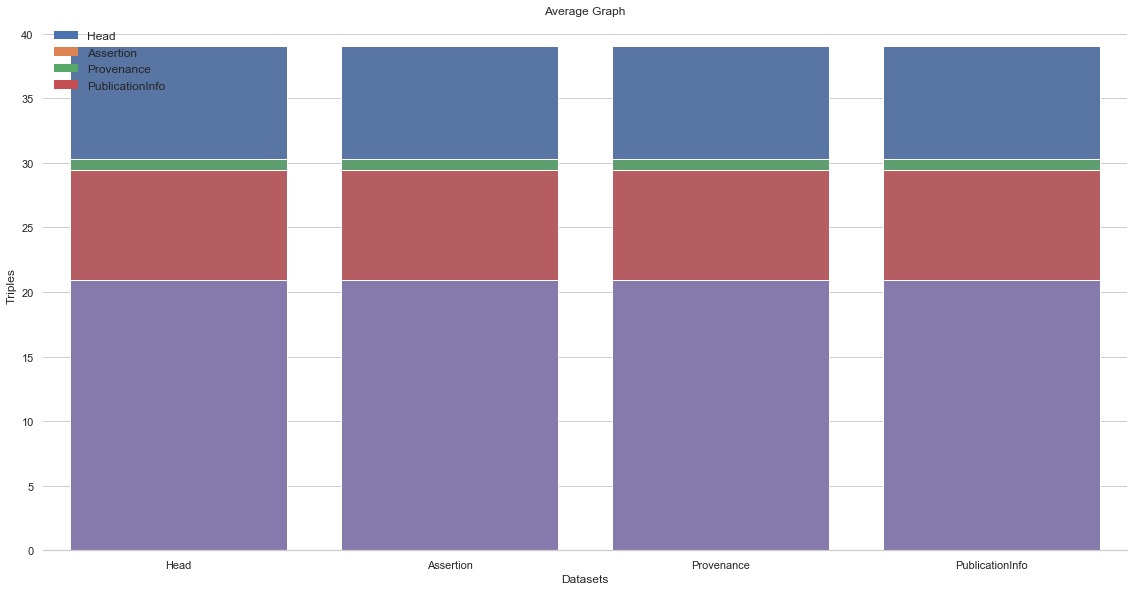

In [142]:
stack_vals = ['Head', 'Assertion', 'Provenance', 'PublicationInfo']
color_spectrum = sns.color_palette()
plt.clf()
    #
stack_total_column = 'total'  # placeholder name which should not exist in pivoted_df
bar_num = 0
legend_rectangles = []
legend_names = []
i = 0
for ds in range(5):    # for every item in the stack we need to compute a rectangle
    stack_color = color_spectrum[bar_num]  # get_hex_l ensures full hex code of color
    df[stack_total_column] = 0
    for graph in stack_vals:  # for every item in the stack we create a new subset [stack_total_column] of 1 to N of the sub values
        df[stack_total_column] = df[stack_total_column] + df['Triples'][i]  # sum up total
        i = i + 1
        # now we have set the subtotal and can plot the bar.  reminder: each bar is overalpped by smaller subsequent bars starting from y=0 axis
    bar_plot = sns.barplot(data=df, x=df["Dataset"],
                           y=stack_total_column, color=stack_color)
    legend_rectangles.append(plt.Rectangle((0,0),1,1,fc=stack_color, edgecolor = 'none'))  
    bar_num += 1
l = plt.legend(legend_rectangles, stack_vals, loc=2, ncol = 1, prop={'size':12})
l.draw_frame(False)
bar_plot.set(xlabel="Datasets", ylabel="Triples")
plt.tight_layout()
plt.title("Average Graph")
sns.despine(left=True)

## Head Graph for all Datasets

In [7]:
with open('distributionHead.csv', mode='w') as csv_file:
    fieldnames = ['DataSets', 'Triples']
    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    writer.writerow(['DataSets', 'Triples'])
    
    # For NeXtProt DataSet
    for t in nxtHeadTriples:
        writer.writerow(['NeXtProt', t])
        
    #For Wikipathways dataset
    for t in wpHeadTriples:
        writer.writerow(['WikiPathways', t])
        
    #For DisGeNet Dataset
    for t in dgHeadTriples:
        writer.writerow(['DisGeNET', t])
        
    #For OpenBell Dataset
    for t in openBellHeadTriples:
        writer.writerow(['OpenBell', t])
        
    #For LIDDI Dataset
    for t in liddiHeadTriples:
        writer.writerow(['LIDDI', t])

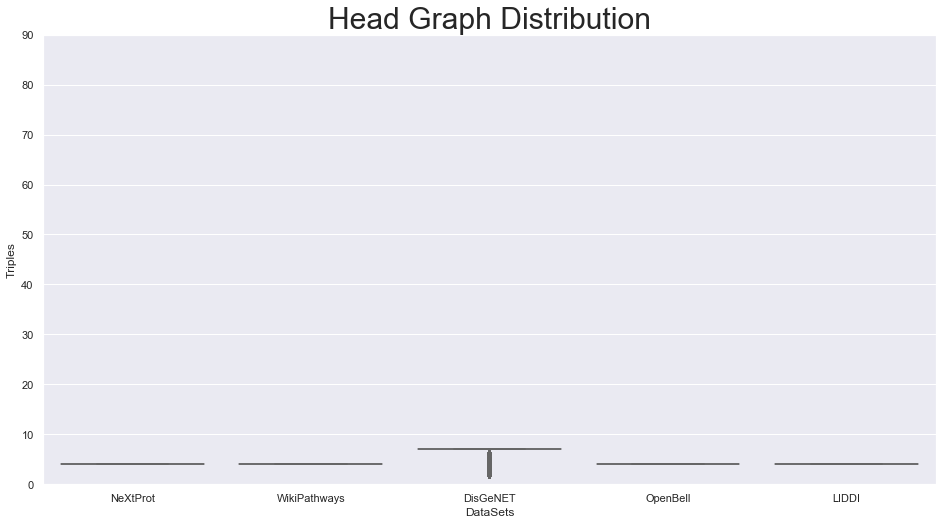

In [8]:
dataAssertions = pd.read_csv('distributionHead.csv')

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(16,8.27)})
ax = sns.boxplot(x="DataSets", y="Triples", data=dataAssertions, palette="Set3")
ax.axes.set_title("Head Graph Distribution",fontsize=30)
ax.set_ylim(0, 90);

## Assertion Graph for all Datasets ##

In [145]:
with open('distributionAssertion.csv', mode='w') as csv_file:
    fieldnames = ['DataSets', 'Triples']
    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    writer.writerow(['DataSets', 'Triples'])
    
    # For NeXtProt DataSet
    for t in nxtAssertionTriples:
        writer.writerow(['NeXtProt', t])
        
    #For Wikipathways dataset
    for t in wpAssertionTriples:
        writer.writerow(['WikiPathways', t])
        
    #For DisGeNet Dataset
    for t in dgAssertionTriples:
        writer.writerow(['DisGeNET', t])
        
    #For OpenBell Dataset
    for t in openBellAssertionTriples:
        writer.writerow(['OpenBell', t])
        
    #For LIDDI Dataset
    for t in liddiAssertionTriples:
        writer.writerow(['LIDDI', t])
    

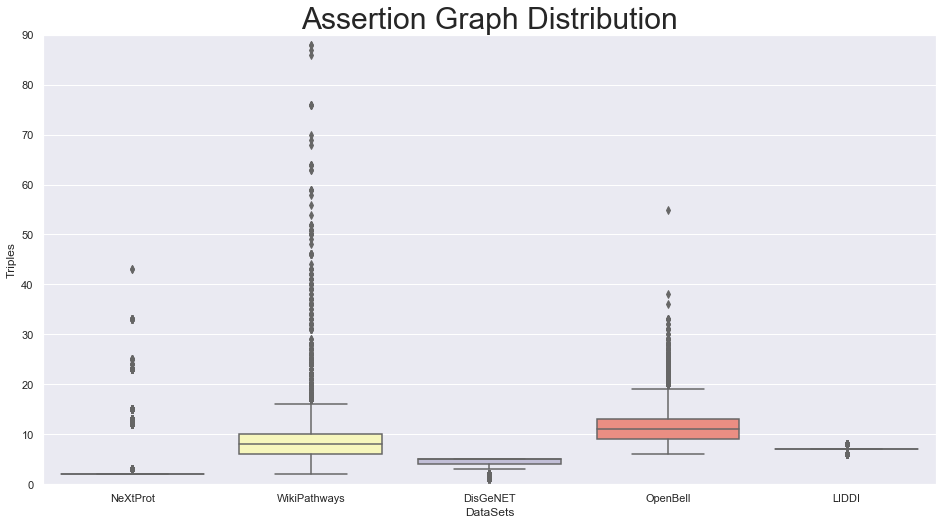

In [146]:
dataAssertions = pd.read_csv('distributionAssertion.csv')

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(16,8.27)})
ax = sns.boxplot(x="DataSets", y="Triples", data=dataAssertions, palette="Set3")
ax.axes.set_title("Assertion Graph Distribution",fontsize=30)
ax.set_ylim(0, 90);

## Average and outliers

In [26]:
import statistics

# For NeXtProt DataSet
avg = statistics.median(nxtAssertionTriples) #round(sum(nxtAssertionTriples) / len(nxtAssertionTriples), 2)
#print(avg)
outliers = 0
for t in nxtAssertionTriples:
    if t > avg:
        outliers = outliers + 1
print('nextProt: ' + str(outliers) + ' ' + str(avg) + ' avg.')

# For Wikipathways DataSet
avg = statistics.median(wpAssertionTriples) #round(sum(wpAssertionTriples) / len(wpAssertionTriples), 2)
#print(avg)
outliers = 0
for t in wpAssertionTriples:
    if t > avg:
        outliers = outliers + 1
print('WP: ' + str(outliers) + ' ' + str(avg) + ' avg.')

# For DisGetNet DataSet
avg = statistics.median(dgAssertionTriples) #round(sum(dgAssertionTriples) / len(dgAssertionTriples), 2)
#print(avg)
outliers = 0
for t in dgAssertionTriples:
    if t > avg:
        outliers = outliers + 1
print('DisGeNET: ' + str(outliers) + ' ' + str(avg) + ' avg.')

# For OpenBEL DataSet
avg = statistics.median(openBellAssertionTriples) #round(sum(openBellAssertionTriples) / len(openBellAssertionTriples), 2)
#print(avg)
outliers = 0
for t in openBellAssertionTriples:
    if t > avg:
        outliers = outliers + 1
print('OpenBel: ' + str(outliers) + ' ' + str(avg) + ' avg.')

# For LIDDI DataSet
avg = statistics.median(liddiAssertionTriples) #round(sum(liddiAssertionTriples) / len(liddiAssertionTriples), 2)
#print(avg)
outliers = 0
for t in liddiAssertionTriples:
    if t > avg:
        outliers = outliers + 1
print('LIDDI: ' + str(outliers) + ' ' + str(avg) + ' avg.')

nextProt: 54457 2.0 avg.
WP: 10998 8.0 avg.
DisGeNET: 0 5.0 avg.
OpenBel: 32311 11 avg.
LIDDI: 345 7 avg.


## Provenance Graph for all Datasets ##

In [147]:
with open('distributionProvenance.csv', mode='w') as csv_file:
    fieldnames = ['DataSets', 'Triples']
    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    writer.writerow(['DataSets', 'Triples'])
    
    # For NeXtProt DataSet
    for t in nxtProvenanceTriples:
        writer.writerow(['NeXtProt', t])
    
    #For Wikipathways dataset
    for t in wpProvenanceTriples:
        writer.writerow(['WikiPathways', t])
        
    #For DisGeNet Dataset
    for t in dgProvenanceTriples:
        writer.writerow(['DisGeNET', t])
        
    #For OpenBell Dataset
    for t in openBellProvenanceTriples:
        writer.writerow(['OpenBell', t])
        
    #For LIDDI Dataset
    for t in liddiProvenanceTriples:
        writer.writerow(['LIDDI', t])

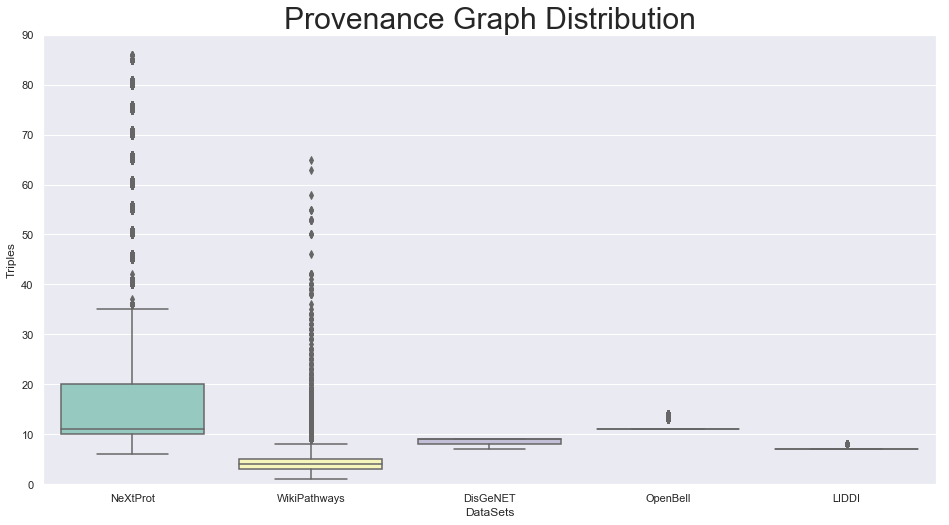

In [148]:
dataProvenance = pd.read_csv('distributionProvenance.csv')

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(16,8.27)})
ax = sns.boxplot(x="DataSets", y="Triples", data=dataProvenance, palette="Set3")
ax.axes.set_title("Provenance Graph Distribution",fontsize=30)
ax.set_ylim(0, 90);

In [27]:
#Median and outliers
# For NeXtProt DataSet
avg = statistics.median(nxtProvenanceTriples) #round(sum(nxtAssertionTriples) / len(nxtAssertionTriples), 2)
#print(avg)
outliers = 0
for t in nxtProvenanceTriples:
    if t > avg:
        outliers = outliers + 1
print('nextProt: ' + str(outliers) + ' ' + str(avg) + ' avg.')

# For Wikipathways DataSet
avg = statistics.median(wpProvenanceTriples) #round(sum(wpAssertionTriples) / len(wpAssertionTriples), 2)
#print(avg)
outliers = 0
for t in wpProvenanceTriples:
    if t > avg:
        outliers = outliers + 1
print('WP: ' + str(outliers) + ' ' + str(avg) + ' avg.')

# For DisGetNet DataSet
avg = statistics.median(dgProvenanceTriples) #round(sum(dgAssertionTriples) / len(dgAssertionTriples), 2)
#print(avg)
outliers = 0
for t in dgProvenanceTriples:
    if t > avg:
        outliers = outliers + 1
print('DisGeNET: ' + str(outliers) + ' ' + str(avg) + ' avg.')

# For OpenBEL DataSet
avg = statistics.median(openBellProvenanceTriples) #round(sum(openBellAssertionTriples) / len(openBellAssertionTriples), 2)
#print(avg)
outliers = 0
for t in openBellProvenanceTriples:
    if t > avg:
        outliers = outliers + 1
print('OpenBel: ' + str(outliers) + ' ' + str(avg) + ' avg.')

# For LIDDI DataSet
avg = statistics.median(liddiProvenanceTriples) #round(sum(liddiAssertionTriples) / len(liddiAssertionTriples), 2)
#print(avg)
outliers = 0
for t in liddiProvenanceTriples:
    if t > avg:
        outliers = outliers + 1
print('LIDDI: ' + str(outliers) + ' ' + str(avg) + ' avg.')

nextProt: 91740 11.0 avg.
WP: 8992 4.0 avg.
DisGeNET: 0 9.0 avg.
OpenBel: 2592 11 avg.
LIDDI: 355 7 avg.


## Publication Information Graph for all Datasets ##

In [149]:
with open('distributionPubInfo.csv', mode='w') as csv_file:
    fieldnames = ['DataSets', 'Triples']
    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    writer.writerow(['DataSets', 'Triples'])
    
    # For NeXtProt DataSet
    for t in nxtPubInfoTriples:
        writer.writerow(['NeXtProt', t])
    
    #For Wikipathways dataset
    for t in wpPubInfoTriples:
        writer.writerow(['WikiPathways', t])
        
    #For DisGeNet Dataset
    for t in dgPubInfoTriples:
        writer.writerow(['DisGeNET', t])
        
    #For OpenBell Dataset
    for t in openBellPubInfoTriples:
        writer.writerow(['OpenBell', t])
        
    #For LIDDI Dataset
    for t in liddiPubInfoTriples:
        writer.writerow(['LIDDI', t])

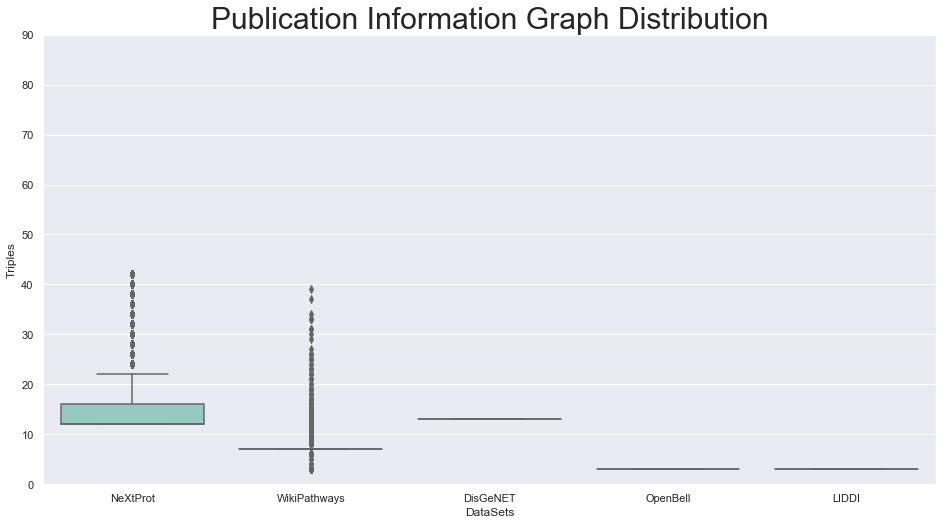

In [150]:
dataPubInfo = pd.read_csv('distributionPubInfo.csv')

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(16,8.27)})
ax = sns.boxplot(x="DataSets", y="Triples", data=dataPubInfo, palette="Set3")
ax.axes.set_title("Publication Information Graph Distribution",fontsize=30)
ax.set_ylim(0, 90);

In [28]:
#Median and outliers
# For NeXtProt DataSet
avg = statistics.median(nxtPubInfoTriples) #round(sum(nxtAssertionTriples) / len(nxtAssertionTriples), 2)
#print(avg)
outliers = 0
for t in nxtPubInfoTriples:
    if t > avg:
        outliers = outliers + 1
print('nextProt: ' + str(outliers) + ' ' + str(avg) + ' avg.')

# For Wikipathways DataSet
avg = statistics.median(wpPubInfoTriples) #round(sum(wpAssertionTriples) / len(wpAssertionTriples), 2)
#print(avg)
outliers = 0
for t in wpPubInfoTriples:
    if t > avg:
        outliers = outliers + 1
print('WP: ' + str(outliers) + ' ' + str(avg) + ' avg.')

# For DisGetNet DataSet
avg = statistics.median(dgPubInfoTriples) #round(sum(dgAssertionTriples) / len(dgAssertionTriples), 2)
#print(avg)
outliers = 0
for t in dgPubInfoTriples:
    if t > avg:
        outliers = outliers + 1
print('DisGeNET: ' + str(outliers) + ' ' + str(avg) + ' avg.')

# For OpenBEL DataSet
avg = statistics.median(openBellPubInfoTriples) #round(sum(openBellAssertionTriples) / len(openBellAssertionTriples), 2)
#print(avg)
outliers = 0
for t in openBellPubInfoTriples:
    if t > avg:
        outliers = outliers + 1
print('OpenBel: ' + str(outliers) + ' ' + str(avg) + ' avg.')

# For LIDDI DataSet
avg = statistics.median(liddiPubInfoTriples) #round(sum(liddiAssertionTriples) / len(liddiAssertionTriples), 2)
#print(avg)
outliers = 0
for t in liddiPubInfoTriples:
    if t > avg:
        outliers = outliers + 1
print('LIDDI: ' + str(outliers) + ' ' + str(avg) + ' avg.')

nextProt: 88859 12.0 avg.
WP: 1433 7.0 avg.
DisGeNET: 0 13.0 avg.
OpenBel: 0 3 avg.
LIDDI: 0 3 avg.


## Authors Distribution in all datasets

In [16]:
#Getting All authors from DisGetNET
query = """
prefix np: <http://www.nanopub.org/nschema#>
prefix npx: <http://purl.org/nanopub/x/>
prefix pav: <http://purl.org/pav/>
prefix prov: <http://www.w3.org/ns/prov#>

select (count(distinct ?author) as ?count) where {
  graph ?h {
    ?np a np:Nanopublication .
    ?np np:hasPublicationInfo ?pubinfo .
  }
  graph ?pubinfo {
    ?np (pav:authoredBy) ?author .
  }
}GROUP By ?np"""

results = queryDisGeNET(query)
dgAuthors = get_array(results)

In [21]:
#Getting All authors from neXtProt
query = """
prefix np: <http://www.nanopub.org/nschema#>

select (count(distinct ?author) as ?count) where {
  graph ?h {
    ?np a np:Nanopublication .
    ?np np:hasPublicationInfo ?pubinfo .
  }
  graph ?pubinfo {
    ?np <http://swan.mindinformatics.org/ontologies/1.2/pav/authoredBy> ?author .
  }
}GROUP By ?np"""

results = queryNeXtProt(query)
nxtAuthors = get_array(results)

In [23]:
#Getting All authors from Wikipathways
query = """
prefix np: <http://www.nanopub.org/nschema#>
prefix npx: <http://purl.org/nanopub/x/>
prefix pav: <http://purl.org/pav/>
prefix prov: <http://www.w3.org/ns/prov#>

select (count(distinct ?author) as ?count) where {
  graph ?h {
    ?np a np:Nanopublication .
    ?np np:hasPublicationInfo ?pubinfo .
  }
  graph ?pubinfo {
    ?np (pav:authoredBy) ?author .
  }
}GROUP By ?np"""

results = queryWP(query)
wikiAuthors = get_array(results)

#Note: Wikipathways has no authors

In [56]:
#Getting All authors from open bel large & small corpus
query = """
prefix np: <http://www.nanopub.org/nschema#>
prefix pav: <http://purl.org/pav/>

select (count(distinct ?author) as ?count) where {
  graph ?h {
    ?np a np:Nanopublication .
    ?np np:hasProvenance ?prov .
  }
  graph ?prov {
    ?s (pav:authoredBy) ?author .
  }
}GROUP By ?np"""

results = queryOpenBellLarge(query)
belLargeAuthors = get_array(results)


query = """
prefix np: <http://www.nanopub.org/nschema#>
prefix pav: <http://purl.org/pav/>

select (count(distinct ?author) as ?count) where {
  graph ?h {
    ?np a np:Nanopublication .
    ?np np:hasProvenance ?prov .
  }
  graph ?prov {
    ?s (pav:authoredBy) ?author .
  }
}GROUP By ?np"""

results = queryOpenBellSmall(query)
belSmallAuthors = get_array(results)


openBellAuthors = []
openBellAuthors.extend(belLargeAuthors)
openBellAuthors.extend(belSmallAuthors)
openBellAuthors.sort()

In [35]:
# LIDDI has no authors beceause its Software Generated.

In [57]:
# All Data in the csv File
with open('distributionAuthors.csv', mode='w') as csv_file:
    fieldnames = ['DataSets', 'Count']
    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    writer.writerow(['DataSets', 'Count'])
    
    # For NeXtProt DataSet
    for t in nxtAuthors:
        writer.writerow(['neXtProt 19001_20000', t])
        
    #For Wikipathways dataset
    if (len(wikiAuthors) > 0):
        for t in wikiAuthors:
            writer.writerow(['WikiPathways 20170513', t])
    else:
        writer.writerow(['WikiPathways 20170513', 0])
        
    #For DisGeNet Dataset
    for t in dgAuthors:
        writer.writerow(['DisGeNET 4.0', t])
        
    #For OpenBell Dataset
    for t in openBellAuthors:
        writer.writerow(['OpenBell 20131211', t])
        
    #LIDDI
    writer.writerow(['LIDDI V1.02', 0])

NameError: name 'nxtAuthors' is not defined

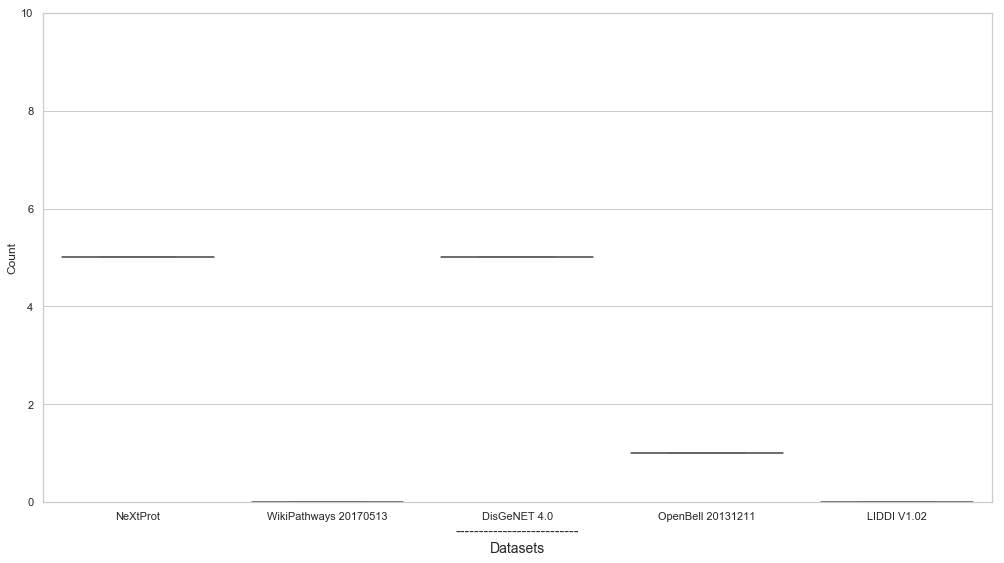

In [10]:
dataAuthors = pd.read_csv('distributionAuthors.csv')

sns.set(style="whitegrid")
ax = sns.boxplot(x="DataSets", y="Count", data=dataAuthors, palette="Set3")
#ax.axes.set_title("Author Distribution",fontsize=30)
ax.axes.set_xlabel('--------------------------\nDatasets', fontsize=14)
ax.set_ylim(0, 10);

## Creators Distribution in all datasets

In [40]:
#Getting All creators from DisGetNET
query = """
prefix np: <http://www.nanopub.org/nschema#>
prefix dct: <http://purl.org/dc/terms/>
prefix dce: <http://purl.org/dc/elements/1.1/>
prefix pav: <http://purl.org/pav/>

select (count(distinct ?creator) as ?count) where {
  graph ?h {
    ?np a np:Nanopublication .
    ?np np:hasPublicationInfo ?pubinfo .
  }
  graph ?pubinfo {
    ?np (dct:creator|dce:creator|pav:createdBy) ?creator .
  }
}GROUP By ?np"""

results = queryDisGeNET(query)
dgCreators = get_array(results)

In [42]:
#Getting All creators from neXtProt
query = """
prefix np: <http://www.nanopub.org/nschema#>
prefix dct: <http://purl.org/dc/terms/>
prefix dce: <http://purl.org/dc/elements/1.1/>
prefix pav: <http://purl.org/pav/>

select (count(distinct ?creator) as ?count) where {
  graph ?h {
    ?np a np:Nanopublication .
    ?np np:hasPublicationInfo ?pubinfo .
  }
  graph ?pubinfo {
    ?np (dct:creator|dce:creator|pav:createdBy) ?creator .
  }
}GROUP By ?np"""

results = queryNeXtProt(query)
nxtCreators = get_array(results)

# neXtProt has no creator 
# Describe Nanopublication
#:NX_Q9UKF6-1_PTM-0207_2.RA-3WCl5c7ZO6xYamZ7X7jL0Ahfe3zQ2bBRH68P66hHUI
#        a                      np:Nanopublication ;
#        dcterms:created        "2014-09-19T00:00:00Z"^^xsd:dateTime ;
#        dcterms:rights         <http://creativecommons.org/licenses/by/3.0/> ;
#        dcterms:rightsHolder   <http://nextprot.org> ;
#        prv:usedData           "neXtProt database" ;
#        <http://swan.mindinformatics.org/ontologies/1.2/pav/authoredBy>
#          "CALIPHO project" ;
#        <http://swan.mindinformatics.org/ontologies/1.2/pav/authoredBy>
#        <http://orcid.org/0000-0001-6710-1373> , <http://orcid.org/0000-0002-1303-2189> , <http://orcid.org/0000-0003-1813-6857> , <http://orcid.org/0000-0001-6818-334X> ;
#        <http://swan.mindinformatics.org/ontologies/1.2/pav/versionNumber>
#        "1" ;
#      np:hasAssertion        <http://www.nextprot.org/nanopubs#NX_Q9UKF6-1_PTM-0207_2.RA-3WCl5c7ZO6xYamZ7X7jL0Ahfe3zQ2bBRH68P66hHUI#assertion> ;
#      np:hasProvenance       <http://www.nextprot.org/nanopubs#NX_Q9UKF6-1_PTM-0207_2.RA-3WCl5c7ZO6xYamZ7X7jL0Ahfe3zQ2bBRH68P66hHUI#provenance> ;
#      np:hasPublicationInfo  <http://www.nextprot.org/nanopubs#NX_Q9UKF6-1_PTM-0207_2.RA-3WCl5c7ZO6xYamZ7X7jL0Ahfe3zQ2bBRH68P66hHUI#pubinfo> ;
#      prov:wasGeneratedBy    <http://www.nextprot.org/nanopubs#NX_Q9UKF6-1_PTM-0207_2.RA-3WCl5c7ZO6xYamZ7X7jL0Ahfe3zQ2bBRH68P66hHUI#_5> .

In [54]:
#Getting All creators from Wikipathways
query = """
prefix np: <http://www.nanopub.org/nschema#>
prefix dct: <http://purl.org/dc/terms/>
prefix dce: <http://purl.org/dc/elements/1.1/>
prefix pav: <http://purl.org/pav/>

select (count(distinct ?creator) as ?count) where {
  graph ?h {
    ?np a np:Nanopublication .
    ?np np:hasPublicationInfo ?pubinfo .
  }
  graph ?pubinfo {
    ?np (dct:creator|dce:creator|pav:createdBy) ?creator .
  }
}GROUP By ?np"""

results = queryWP(query)
wikiCreators = get_array(results)

#Describe nanopublication
#<http://purl.org/np/RASqUFyaiZdd8viHLNjoTtdv3SvoTJ-Qpx4DpfcXPHQSg>
#        a                      np:Nanopublication ;
#        dcterms:created        "2017-05-08T15:57:43.151+02:00"^^xsd:dateTime ;
#        dcterms:rights         <https://creativecommons.org/licenses/by/3.0/> ;
#        np:hasAssertion        <http://purl.org/np/RASqUFyaiZdd8viHLNjoTtdv3SvoTJ-Qpx4DpfcXPHQSg#assertion> ;
#        np:hasProvenance       <http://purl.org/np/RASqUFyaiZdd8viHLNjoTtdv3SvoTJ-Qpx4DpfcXPHQSg#provenance> ;
#        np:hasPublicationInfo  <http://purl.org/np/RASqUFyaiZdd8viHLNjoTtdv3SvoTJ-Qpx4DpfcXPHQSg#publicationInfo> ;
#        prov:wasDerivedFrom    <http://identifiers.org/wikipathways/WP176_r85063> .

In [46]:
#Getting All creators from large and small corpus
query = """
prefix np: <http://www.nanopub.org/nschema#>
prefix dct: <http://purl.org/dc/terms/>
prefix dce: <http://purl.org/dc/elements/1.1/>
prefix pav: <http://purl.org/pav/>

select (count(distinct ?creator) as ?count) where {
  graph ?h {
    ?np a np:Nanopublication .
    ?np np:hasPublicationInfo ?pubinfo .
  }
  graph ?pubinfo {
    ?np (dct:creator|dce:creator|pav:createdBy) ?creator .
  }
}GROUP By ?np"""

results = queryOpenBellLarge(query)
belLargeCreators = get_array(results)

query = """
prefix np: <http://www.nanopub.org/nschema#>
prefix dct: <http://purl.org/dc/terms/>
prefix dce: <http://purl.org/dc/elements/1.1/>
prefix pav: <http://purl.org/pav/>

select (count(distinct ?creator) as ?count) where {
  graph ?h {
    ?np a np:Nanopublication .
    ?np np:hasPublicationInfo ?pubinfo .
  }
  graph ?pubinfo {
    ?np (dct:creator|dce:creator|pav:createdBy) ?creator .
  }
}GROUP By ?np"""

results = queryOpenBellSmall(query)
belSmallCreators = get_array(results)


openBellCreators = []
openBellCreators.extend(belLargeCreators)
openBellCreators.extend(belSmallCreators)
openBellCreators.sort()

#Describe Nanopublication

#<http://www.tkuhn.ch/bel2nanopub/RAlKFUbz4ZPgXiJNsebuH06skrZbx0Ix7XSWK5z4u69v4>
#        a                      np:Nanopublication ;
#        dct:created            "2014-07-03T14:31:25.409+02:00"^^xsd:dateTime ;
#        pav:createdBy          orcid:0000-0002-1267-0234 , orcid:0000-0001-6818-334X ;
#        np:hasAssertion        <http://www.tkuhn.ch/bel2nanopub/RAlKFUbz4ZPgXiJNsebuH06skrZbx0Ix7XSWK5z4u69v4#assertion> ;
#        np:hasProvenance       <http://www.tkuhn.ch/bel2nanopub/RAlKFUbz4ZPgXiJNsebuH06skrZbx0Ix7XSWK5z4u69v4#provenance> ;
#        np:hasPublicationInfo  <http://www.tkuhn.ch/bel2nanopub/RAlKFUbz4ZPgXiJNsebuH06skrZbx0Ix7XSWK5z4u69v4#pubinfo> .

In [47]:
#Getting All creators from LIDDI
query = """
prefix np: <http://www.nanopub.org/nschema#>
prefix prov: <http://www.w3.org/ns/prov#>

select (count(distinct ?creator) as ?count) where {
  graph ?h {
    ?np a np:Nanopublication .
    ?np np:hasPublicationInfo ?pubinfo .
  }
  graph ?pubinfo {
    ?np (prov:wasAttributedTo) ?creator .
  }
}GROUP By ?np"""

results = queryLIDDI(query)
liddiCreators = get_array(results)

#Describe Nanopublication
#ddir:EID0002_nanopub  a        np:Nanopublication ;
#        dcterms:license        <http://creativecommons.org/licenses/by/3.0/> ;
#        np:hasAssertion        ddir:EID0002_nanopubassertion ;
#        np:hasProvenance       ddir:EID0002_nanopubprovenance ;
#        np:hasPublicationInfo  ddir:EID0002_nanopubpublicationInfo ;
#        prov:generatedAtTime   "2016-04-06T15:01:38.194767"^^xsd:dateTime ;
#        prov:wasAttributedTo   orcid:0000-0001-8499-824X .

In [51]:
# All Data in the csv File
with open('distributionCreators.csv', mode='w') as csv_file:
    fieldnames = ['DataSets', 'Count']
    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    writer.writerow(['DataSets', 'Count'])
    
    # For NeXtProt DataSet
    if (len(nxtCreators) > 0):
        for t in nxtCreators:
            writer.writerow(['NeXtProt', t])
    else:
        writer.writerow(['NeXtProt', 0])
        
    #For Wikipathways dataset
    if (len(wikiCreators) > 0):
        for t in wikiCreators:
            writer.writerow(['WikiPathways 20170513', t])
    else:
        writer.writerow(['WikiPathways 20170513', 0])   
        
    #For DisGeNet Dataset
    for t in dgCreators:
        writer.writerow(['DisGeNET 4.0', t])
        
    #For OpenBell Dataset
    for t in openBellCreators:
        writer.writerow(['OpenBell 20131211', t])

    #For LIDDI Dataset
    for t in liddiCreators:
        writer.writerow(['LIDDI V1.02', t])

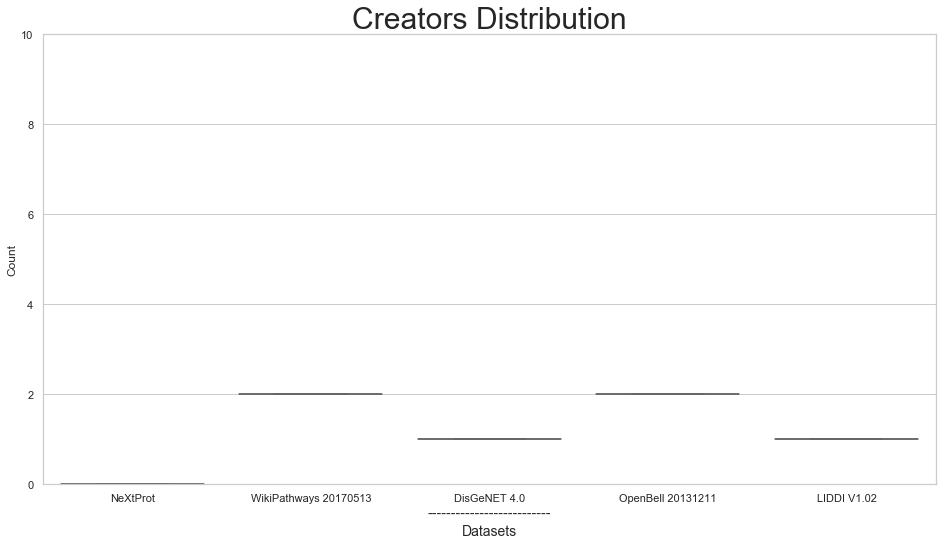

In [59]:
dataCreators = pd.read_csv('distributionCreators.csv')

sns.set(style="whitegrid")
ax = sns.boxplot(x="DataSets", y="Count", data=dataCreators, palette="Set3")
ax.axes.set_title("Creators Distribution",fontsize=30)
ax.axes.set_xlabel('--------------------------\nDatasets', fontsize=14)
ax.set_ylim(0, 10);

## Total Nanopublications in each dataset

In [63]:
# The following query represent the count of nanopublication in neXtProt 
query = """
prefix np: <http://www.nanopub.org/nschema#>
select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication .
       }
    }
"""

results = queryNeXtProt(query)
nxtTotalNano = get_array(results)

In [64]:
nxtTotalNano

[220916]

In [65]:
# The following query represent the count of nanopublication in DisGeNET 
query = """
prefix np: <http://www.nanopub.org/nschema#>
select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication .
       }
    }
"""

results = queryDisGeNET(query)
dgTotalNano = get_array(results)

In [66]:
dgTotalNano

[1414902]

In [67]:
# The following query represent the count of nanopublication in Wikipathways 
query = """
prefix np: <http://www.nanopub.org/nschema#>
select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication .
       }
    }
"""

results = queryWP(query)
wikiTotalNano = get_array(results)

In [68]:
wikiTotalNano

[26934]

In [74]:
# The following query represent the count of nanopublication in large and small corpus 
query = """
prefix np: <http://www.nanopub.org/nschema#>
select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication .
       }
    }
"""

results = queryOpenBellLarge(query)
largeTotalNano = get_array(results)

query = """
prefix np: <http://www.nanopub.org/nschema#>
select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication .
       }
    }
"""

results = queryOpenBellSmall(query)
smallTotalNano = get_array(results)

openBelTotalNano = []
openBelTotalNano.append(largeTotalNano[0] + smallTotalNano[0])

In [75]:
openBelTotalNano

[74173]

In [71]:
# The following query represent the count of nanopublication in LIDDI 
query = """
prefix np: <http://www.nanopub.org/nschema#>
select (count(*) as ?count) where {
      graph ?h {
        ?_np_iri a np:Nanopublication .
       }
    }
"""

results = queryLIDDI(query)
liddiTotalNano = get_array(results)

In [72]:
liddiTotalNano

[98085]

In [76]:
# All Data in the csv File
with open('totalNanopublications.csv', mode='w') as csv_file:
    fieldnames = ['DataSets', 'Count']
    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    writer.writerow(['DataSets', 'Count'])
    
    # For NeXtProt DataSet
    for t in nxtTotalNano:
            writer.writerow(['neXtProt 19001_20000', t])
    
    #For Wikipathways dataset
    for t in wikiTotalNano:
        writer.writerow(['WikiPathways 20170513', t])
        
    #For DisGeNet Dataset
    for t in dgTotalNano:
        writer.writerow(['DisGeNET 4.0', t])
        
    #For OpenBell Dataset
    for t in openBelTotalNano:
        writer.writerow(['OpenBell 20131211', t])

    #For LIDDI Dataset
    for t in liddiTotalNano:
        writer.writerow(['LIDDI V1.02', t])

Text(0, 0.5, 'Total Nanopublication Count')

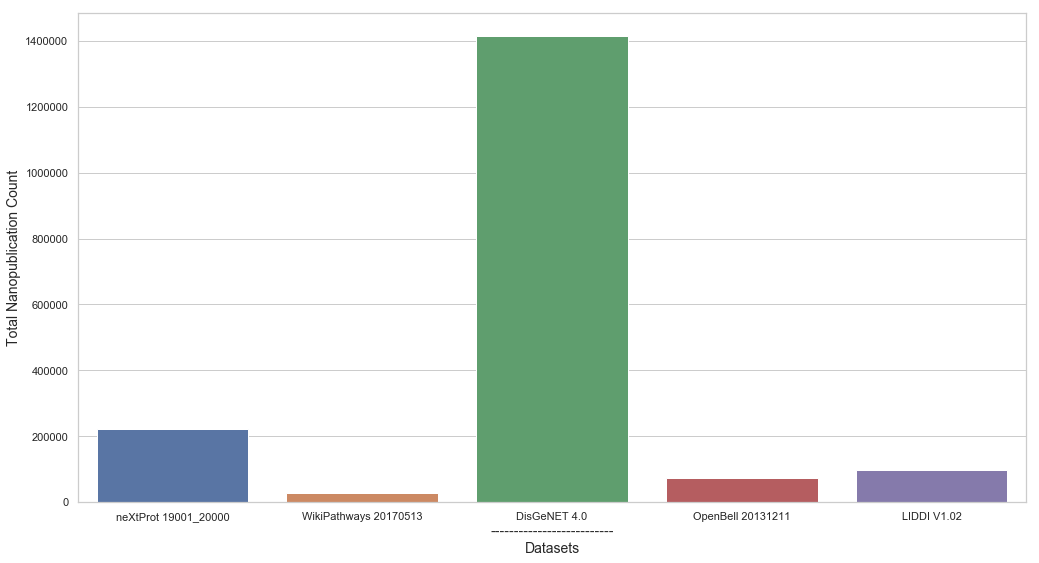

In [14]:
dataNP = pd.read_csv('totalNanopublications.csv')
sns.set(style="whitegrid")
#For bar plot use following line
ax = sns.barplot(x="DataSets", y="Count", data=dataNP)

#For boxplot use following line
#ax = sns.boxplot(x="DataSets", y="Count", data=dataNP, palette="Set3")

#ax.axes.set_title("Total number of Nanopublications in each dataset",fontsize=30)
ax.axes.set_xlabel('--------------------------\nDatasets', fontsize=14)
ax.axes.set_ylabel('Total Nanopublication Count', fontsize=14)